In [1]:
import numpy as np
import collections
import matplotlib.pylab as plt

### Supor primeiro que todas as firmas NW

In [2]:
def init (A_init, K_init, rdmin_init, rdnw_init, pi_init, PI_init, q_init):
    global A_i, K_i, im_i, in_i, rd_min, rd_nw, q_i, pi_i, nw_firms
    A_i =  A_init
    K_i = K_init
    rd_min = rdmin_init
    rd_nw = rdnw_init
    q_i = q_init
    pi_i = pi_init
    PI_i = PI_init
    nw_firms = {x: [] for x in range (40)}
    #im_firms = {x: [] for x in range (n_firms / 2)}
    [nw_firms[x].append([A_i, q_i, K_i, pi_i, PI_i, rd_min, rd_nw]) for x in nw_firms]
    #[im_firms[x].append([A_i, q_i, K_i, pi_i, im_i]) for x in im_firms]

In [3]:
def Q_updates(nw_firms):#, im_firms):
    global Q_tot
    Q_tot = 0
    for i in nw_firms:
        nw_firms[i][0][1] = nw_firms[i][0][0]*nw_firms[i][0][2] 
        Q_tot = nw_firms[i][0][1] + Q_tot
    #for i in im_firms:
    #    im_firms[i][0][1] = im_firms[i][0][0]*im_firms[i][0][2] 
    #   Q_tot = im_firms[i][0][1] + Q_tot

In [4]:
def P_update (Q_tot):
    global P
    P = 100/(Q_tot)**(0.5)

In [5]:
def pi_updates (nw_firms):#, im_firms, P):
    #for i in im_firms:
    #    im_firms[i][0][3] = P*im_firms[i][0][0] - 0.16 - im_firms[i][0][4]
    for i in nw_firms:
        nw_firms[i][0][3] = P*nw_firms[i][0][0] - 0.1

In [6]:
def PI_UPDATES (nw_firms):#, im_firms, P):
    #for i in im_firms:
    #    im_firms[i][0][3] = P*im_firms[i][0][0] - 0.16 - im_firms[i][0][4]
    for i in nw_firms:
        nw_firms[i][0][4] = nw_firms[i][0][3]*nw_firms[i][0][2]

In [7]:
def A_updates (nw_firms):
    for i in nw_firms:
        As = []
        if np.random.random() < 0.225*(nw_firms[i][0][4]+nw_firms[i][0][5])*nw_firms[i][0][2]:
            As.append(np.random.normal(nw_firms[i][0][0], 0.05))
        if np.random.random() < 2.25*(nw_firms[i][0][4]+nw_firms[i][0][5])*nw_firms[i][0][2]:
            A_ = max([nw_firms[x][0][0] for x in nw_firms])
            As.append(nw_firms[i][0][0] + (0.05/10)*(A_ - nw_firms[i][0][0]))
        As.append(nw_firms[i][0][0])
        nw_firms[i][0][0] = max(As)
#    for i in im_firms:
#        As = []
#        if np.random.random() < 1.25*im_firms[i][0][4]*im_firms[i][0][2]:
#            As.append(max(max([in_firms[x][0][0] for x in in_firms]),\
#                          max([im_firms[x][0][0] for x in im_firms])))
#        As.append(in_firms[i][0][0])
#        im_firms[i][0][0] = max(As)

In [8]:
def K_update(nw_firms):
    for i in nw_firms:
        nw_firms[i][0][2] = nw_firms[i][0][4]*(1 - max(0.03, 0.1) ) + 0.95*nw_firms[i][0][2] 
        
    #for i in im_firms:
    #    im_firms[i][0][2] = im_firms[i][0][2]*im_firms[i][0][5] +\
    #    0.97*im_firms[i][0][2] 

In [9]:
i = 1
prices = []
AVG_As = []
Best_As = []
while i <= 20:
    init (A_init=0.16, K_init=50, rdmin_init=0.03, rdnw_init=0.1, pi_init=0, PI_init=0, q_init=0)
    Q_updates(nw_firms=nw_firms)
    P_update(Q_tot=Q_tot)
    pi_updates (nw_firms=nw_firms)
    PI_UPDATES (nw_firms=nw_firms)
    K_update(nw_firms)
    for j in range (6001):
        A_updates (nw_firms=nw_firms)
        Q_updates(nw_firms=nw_firms)
        P_update(Q_tot=Q_tot)
        pi_updates (nw_firms=nw_firms)
        PI_UPDATES (nw_firms=nw_firms)
        K_update(nw_firms)
        if (j % 40)==0:
            prices.append(P)
            AVG_As.append(np.mean([nw_firms[x][0][0] for x in nw_firms]))
            Best_As.append(max([nw_firms[x][0][0] for x in nw_firms]))
            
    i = i +1

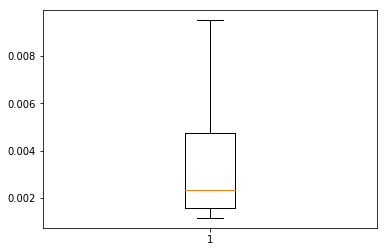

In [13]:
plt.boxplot(prices,showfliers=False)
plt.show()

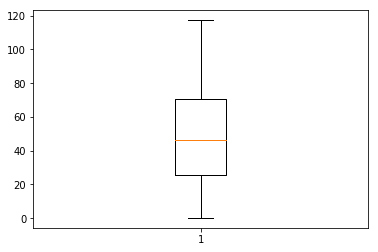

In [11]:
plt.boxplot(AVG_As)
plt.show()

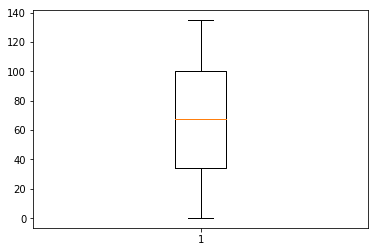

In [12]:
plt.boxplot(Best_As)
plt.show()

In [56]:
len(Best_As)

3020